In [3]:
# !pip install rake_nltk
from rake_nltk import Rake   # ensure this is installed

import nltk
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
import warnings

Cosine Similarity Of features based off of similarity of descriptions and Mood

In [4]:
import pandas as pd


df = pd.read_csv('Data/netfix_cleaned.csv')

In [5]:
df["mood"] = df["mood"].fillna("Unlabeled")

In [6]:
df

,names,release_year,maturity_rating,duration,description,genre,mood,cast,subtitles,audio
0,Mission Majnu,2023,U/A 16+,2h 9m,"In the 1970s, an undercover Indian spy takes o...","['Spy Movies', 'Hindi-Language Movies', 'Bolly...",Suspenseful,"['Sidharth Malhotra', 'Rashmika Mandanna', 'Pa...","['English,', 'English,', 'Hindi']","['English,', 'Hindi - Audio Description,', 'Hi..."
1,Cirkus,2022,U/A 7+,2h 14m,Chaos and comedy take the spotlight when a rin...,"['Hindi-Language Movies', 'Bollywood Movies', ...",Goofy,"['Ranveer Singh', 'Varun Sharma', 'Pooja Hegde...","['English,', 'Hindi']",['Hindi [Original]']
2,Gangubai Kathiawadi,2022,U/A 16+,2h 33m,"Duped and sold to a brothel, a young woman fea...","['Hindi-Language Movies', 'Movies Based on Boo...",Provocative,"['Alia Bhatt', 'Vijay Raaz', 'Seema Pahwa', 'A...","['English,', 'Hindi']","['Hindi [Original],', 'Telugu']"
3,Thunivu,2023,U/A 16+,2h 22m,A major bank heist takes an unnerving turn whe...,"['Crime Movies', 'Action & Adventure']",Exciting,"['Ajith Kumar', 'Manju Warrier', 'Samuthirakan...","['English,', 'Hindi']",['Tamil [Original]']
4,Bhool Bhulaiyaa 2,2022,U/A 13+,2h 21m,"When strangers Reet and Ruhan cross paths, the...","['Hindi-Language Movies', 'Bollywood Movies', ...","Offbeat,","['Tabu', 'Kartik Aaryan', 'Kiara Advani', 'Raj...","['English,', 'Hindi']",['Hindi [Original]']
...,...,...,...,...,...,...,...,...,...,...
555,Happy New Year,2014,U/A 13+,2h 58m,A revenge-seeking diamond thief gathers a ragt...,"['Hindi-Language Movies', 'Bollywood Movies', ...",Feel-Good,"['Shah Rukh Khan', 'Deepika Padukone', 'Abhish...",['English'],['Hindi [Original]']
556,RRR (Hindi),2022,A,3h 5m,A fearless warrior on a perilous mission comes...,"['Action & Adventure', 'Dramas']",Adrenaline Rush,"['NTR Jr.', 'Ram Charan', 'Ajay Devgn', 'Alia ...","['English,', 'Hindi']","['English,', 'Hindi']"
557,Major (Telugu),2022,U/A 16+,2h 25m,This biopic follows the life of Indian Army of...,"['Movies Based on Real Life', 'Action & Advent...","Bittersweet,","['Adivi Sesh', 'Prakash Raj', 'Sobhita Dhulipa...",['English'],['Telugu [Original]']
558,Om Shanti Om,2007,U/A 16+,2h 48m,Reincarnated 30 years after being killed in a ...,"['Romantic Comedies', 'Hindi-Language Movies',...","Emotional,","['Shah Rukh Khan', 'Deepika Padukone', 'Shreya...",['English'],['Hindi [Original]']


In [7]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gavingalusha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer



In [9]:
import numpy as np
import torch
from sklearn.preprocessing import OneHotEncoder, MultiLabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer
# Initialize two vectorizers
vectorizer_desc = TfidfVectorizer(stop_words='english')
vectorizer_mood = TfidfVectorizer(stop_words='english')

# Fit and transform the data for each feature
tfidf_matrix_desc = vectorizer_desc.fit_transform(df['description'])
tfidf_matrix_mood = vectorizer_mood.fit_transform(df['mood'])
one_hot_encoder = OneHotEncoder(sparse=False)
encoded_release_year = one_hot_encoder.fit_transform(df[['release_year']])
encoded_maturity_rating = one_hot_encoder.fit_transform(df[['maturity_rating']])

# Normalize 'duration' (convert to total minutes)


vec = TfidfVectorizer()
encoded_description = vec.fit_transform(df.description).toarray() 


# Multi-hot encoding for 'genre' and 'cast'
mlb_genre = MultiLabelBinarizer()
mlb_cast = MultiLabelBinarizer()
encoded_genre = mlb_genre.fit_transform(df['genre'])
encoded_cast = mlb_cast.fit_transform(df['cast'])

# One-hot encoding for 'mood'


# Combine all features into a features tensor
#features = np.hstack([encoded_release_year, encoded_maturity_rating, df[['total_minutes']].values, encoded_genre, encoded_cast, encoded_description])


/Users/gavingalusha/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/gavingalusha/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [10]:
# Extract hours and minutes from the duration column
df['hours'] = df['duration'].str.extract('(\d+)h').fillna(0)
df['minutes'] = df['duration'].str.extract('(\d+)m').fillna(0)

# Convert the hours and minutes to integers
df['hours'] = df['hours'].astype(int)
df['minutes'] = df['minutes'].astype(int)

# Calculate the total minutes
df['total_minutes'] = df['hours'] * 60 + df['minutes']

# Now you can drop the 'hours' and 'minutes' columns if they are not needed
df = df.drop(['hours', 'minutes'], axis=1)

In [11]:
from scipy.sparse import csr_matrix, hstack
from sklearn.preprocessing import StandardScaler

# Assuming you've already executed the encoding steps you mentioned

# Normalize 'duration' (example: converting hours to minutes not shown here)
scaler = StandardScaler()
normalized_duration = scaler.fit_transform(df[['total_minutes']])

# Convert dense arrays to sparse matrices to allow concatenation with TF-IDF matrices
sparse_encoded_release_year = csr_matrix(encoded_release_year)
sparse_encoded_maturity_rating = csr_matrix(encoded_maturity_rating)
sparse_normalized_duration = csr_matrix(normalized_duration)
sparse_encoded_genre = csr_matrix(encoded_genre)
sparse_encoded_cast = csr_matrix(encoded_cast)

# Combine all feature matrices into one. Ensure all are in the same sparse/dense format before combining.
combined_features = hstack([
    tfidf_matrix_desc, 
    tfidf_matrix_mood, 
    sparse_encoded_release_year, 
    sparse_encoded_maturity_rating, 
    sparse_normalized_duration, 
    sparse_encoded_genre, 
    sparse_encoded_cast
])

# Now, `combined_features` is ready for use with cosine similarity



In [12]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity using the combined features matrix
cosine_sim = cosine_similarity(combined_features, combined_features)

# Now, `cosine_sim` contains the cosine similarity scores between all pairs of items.



In [13]:
def recommend_movies(title, df, cosine_sim, top_n=5):
    # Find matches by searching in the 'names' column
    matches = df.index[df['names'].str.contains(title, case=False, na=False)].tolist()
    
    # Check if any matches were found
    if not matches:
        return f"No movies found matching the title: {title}"
    
    # Proceed with the first found match for demonstration purposes
    idx = matches[0]
    original_movie_name = df.iloc[idx]['names']
    original_movie_description = df.iloc[idx]['description']
    
    # Initialize an empty list to keep track of recommended indices to exclude them in future recommendations
    exclude_indices = matches[:]  # Start with excluding matches (including duplicates of the original movie)
    
    # Prepare to collect top recommendations
    top_recommendations = []

    for _ in range(top_n):
        sim_scores = list(enumerate(cosine_sim[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        
        # Find the next top recommendation that has not already been recommended
        next_recommendation = next((sim for sim in sim_scores if sim[0] not in exclude_indices), None)
        
        if next_recommendation is not None:
            # Add the recommended movie's index to the list of indices to exclude
            exclude_indices.append(next_recommendation[0])
            top_recommendations.append(next_recommendation)
        else:
            break  # Exit the loop if no more unique recommendations can be made
    
    movie_indices = [i[0] for i in top_recommendations]
    
    # Fetch movie names and descriptions for recommended movies
    movies = df.iloc[movie_indices]
    recommended_movies = movies.apply(lambda x: f"{x['names']}: {x['description']}", axis=1).tolist()
    
    # Prepare the result string
    result = f"Original Movie:\n{original_movie_name}: {original_movie_description}\n\nRecommended Movies:\n"
    result += '\n'.join(recommended_movies)
    return result


In [23]:
print(recommend_movies("Don", df, cosine_sim, top_n=3))
print(recommend_movies("asdfl;j", df, cosine_sim, top_n=2))

Original Movie:
Don 2: With Asia under his complete control, criminal mastermind Don turns to Europe, battling the mob bosses of each nation along the way.

Recommended Movies:
Saaho: In a fictional megalopolis, a stunning underworld theft triggers a fierce power struggle among the gangsters, with an enigmatic cop on their trail.
Saaho: In a fictional megalopolis, a stunning underworld theft triggers a fierce power struggle among the gangsters, with an enigmatic cop on their trail.
Saaho: In a fictional megalopolis, a stunning underworld theft triggers a fierce power struggle among the gangsters, with an enigmatic cop on their trail.
No movies found matching the title: asdfl;j


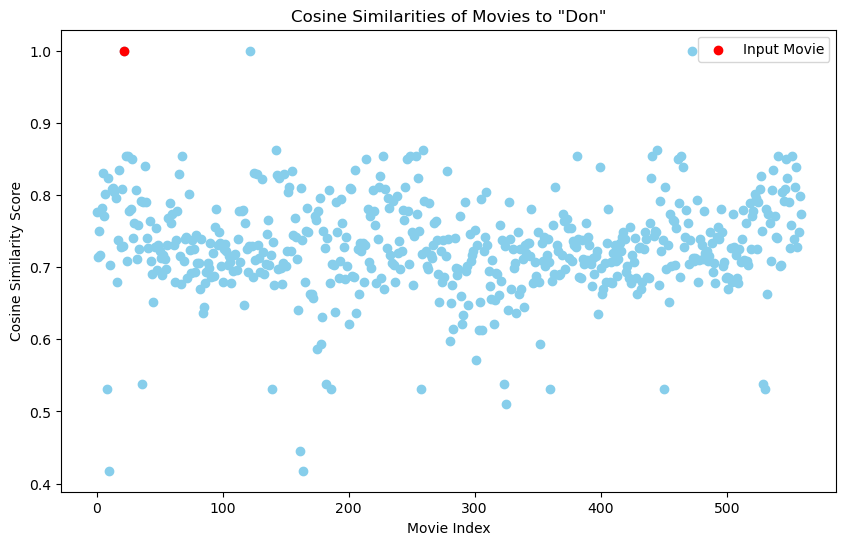

Plot saved to top_similar_movies.pdf


In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming `df` is your DataFrame containing movie titles in a column named 'names'
# and `cosine_sim` is the cosine similarity matrix you've already computed

def plot_movie_similarities(title, df, cosine_sim, filename='top_similar_movies.pdf'):
    # Find the index of the movie that matches the title
    try:
        idx = df.index[df['names'].str.contains(title, case=False, na=False)].tolist()[0]
    except IndexError:
        print(f"No movies found matching the title: {title}")
        return
    
    # Get the row of cosine similarities for the input movie
    movie_similarities = cosine_sim[idx]
    
    # Create a scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(movie_similarities)), movie_similarities, color='skyblue')
    
    # Highlighting the input movie
    plt.scatter([idx], [1], color='red', label='Input Movie', zorder=5)
    
    plt.title(f'Cosine Similarities of Movies to "{title}"')
    plt.xlabel('Movie Index')
    plt.ylabel('Cosine Similarity Score')
    plt.legend()
    plt.show()

    plt.savefig(filename, format='pdf', bbox_inches='tight')
    plt.close()

    print(f"Plot saved to {filename}")

# Example usage
plot_movie_similarities("Don", df, cosine_sim)


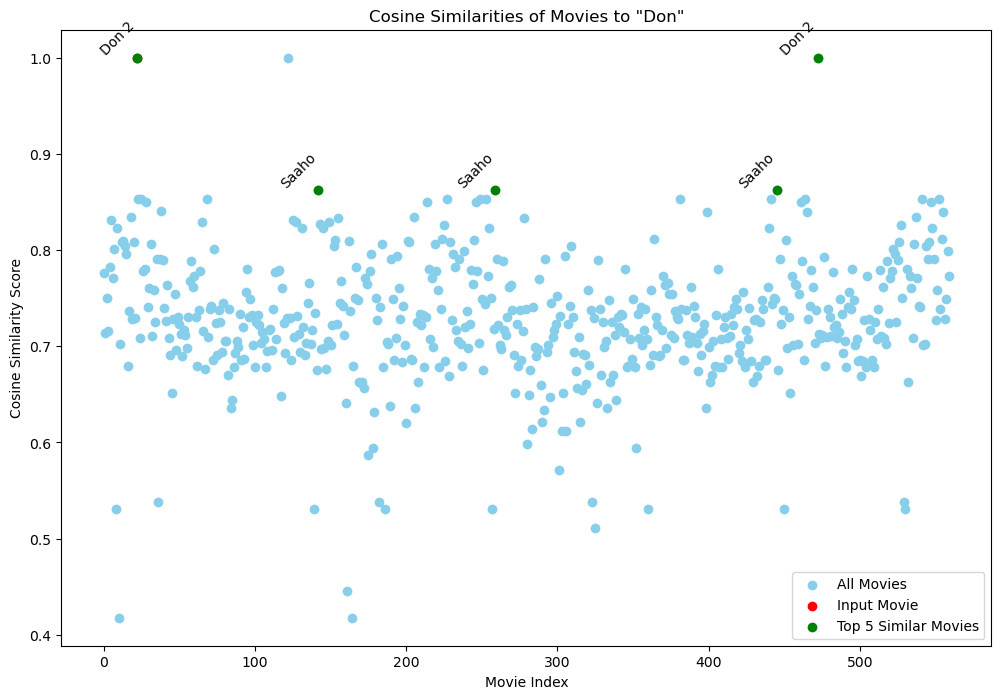

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_top_similar_movies2(title, df, cosine_sim):
    # Find the index of the movie that matches the title
    try:
        idx = df.index[df['names'].str.contains(title, case=False, na=False)].tolist()[0]
    except IndexError:
        print(f"No movies found matching the title: {title}")
        return
    
    # Get the row of cosine similarities for the input movie
    movie_similarities = cosine_sim[idx]
    
    # Sort movies by similarity (excluding the input movie itself)
    sorted_indices = np.argsort(-movie_similarities)
    top_indices = sorted_indices[1:6]  # Exclude the first one since it's the input movie itself
    
    # Create a scatter plot for all movies
    plt.figure(figsize=(12, 8))
    all_movies = plt.scatter(range(len(movie_similarities)), movie_similarities, color='skyblue', label='All Movies')
    
    # Highlight the input movie
    input_movie = plt.scatter([idx], [1], color='red', label='Input Movie', zorder=5)
    
    # Highlight and label the top 5 similar movies
    top_movies = plt.scatter(top_indices, movie_similarities[top_indices], color='green', label='Top 5 Similar Movies', zorder=5)
    for i in top_indices:
        plt.text(i, movie_similarities[i], df['names'].iloc[i], rotation=45, ha='right', va='bottom')

    plt.title(f'Cosine Similarities of Movies to "{title}"')
    plt.xlabel('Movie Index')
    plt.ylabel('Cosine Similarity Score')
    plt.legend(handles=[all_movies, input_movie, top_movies])
    plt.show()

# Example usage
plot_top_similar_movies2("Don", df, cosine_sim)
